# Homework #2 Part I: <br>Prove that as a function of $\theta$...


Student: Ante Malenica

---

$$
\begin{align*}
&\color{white}{\propto}{} \exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] \\
&\propto{}  
\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)
\end{align*}
$$

### Hint 1: expand the squares, and rebuild the quadratic in terms of $\theta$...
### Hint 2: anything that's not $\theta$ is a constant... and you can drop or multiply by any constant you want to complete the square...


$$
\begin{align*}
\exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] &= \exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi \left(x_{i}^{2} - 2x_{i}\theta + \theta^{2}\right)\right)+ \tau\left(\theta^{2} - 2\theta\theta_0 + \theta_{0}^{2}\right)\right)\right] &\text{(expanded squares)}\\
&=\exp\left[-\frac{1}{2}\left(\phi\left(\sum_{i=1}^n x_{i}^{2}\right) - 2\phi\theta\left(\sum_{i=1}^n x_{i}\right) + n\phi\theta^{2} + \tau\theta^{2} - 2\tau\theta_{0}\theta + \tau\theta_{0}^{2}\right)\right] &\text{(sum of $n$ constants property)} \\
&=\exp\left[-\frac{1}{2}\left(\phi\left(\sum_{i=1}^n x_{i}^{2}\right) - 2\phi\theta\left(\sum_{i=1}^n x_{i}\right) + \theta^{2}\left(\tau + n\phi\right) - 2\tau\theta_{0}\theta + \tau\theta_{0}^{2}\right)\right]\\
&= \exp\left[-\frac{1}{2}\left(\tau + n\phi\right)\left(\theta^{2} - \frac{2\theta}{\tau+n\phi}\left(\tau\theta_{0} + \phi\sum^{n}_{i=1} x_{i}\right) + \frac{\phi\sum_{i=1}^n x_{i}^{2}}{\tau + n\phi} + \frac{\tau\theta_{0}^{2}}{\tau + n\phi}\right)\right]\\
&= \exp\left[-\frac{1}{2}\left(\tau + n\phi\right)\left(\theta^{2} - \frac{2\theta}{\tau+n\phi}\left(\tau\theta_{0} + \phi\sum^{n}_{i=1} x_{i}\right)\right)\right]\\
&\propto{}  
\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2\right)
\end{align*}$$
This outcome is supported by the fact that the term $\tau\theta_{0} + \phi\sum^{n}_{i=1} x_{i}$ does not contain any $\theta$ value. Hence, proportionality holds.

# Homework #2 Part II: Complete the following...

1. Make the "Classic Bayes" figure, but instead of a single likelihood, plot the individual likelihoods of each observation. *Hint: Consider the code...*
    
    ```python
    for xi in range(x):
        print(xi)
    ```     
2. Make the "Classic Bayes" figure for the normal-normal model on a log scale. *Hint: plot loglikehood, prior logpdf, and the log of the joint distribution using* `stats.norm.logpdf()`
    
3. What is the ***posterior distribution*** of a **normal likelihood** with $p(\theta) \propto 1$?
4. What's the difference between a **log likelihood** and **log posterior** when an **improper prior** is used? *Hint: it has something to do with the **log of the marginal likelihood constant** [or, another way to start thinking about this is to instead ask the question: What's the diffence between a **likelihood** and **posterior** when an **improper prior** is used? Hint: it has something to do with the **marginal likelihood constant**.]*

<!-- posterior proporitional to joint... -->


### Question 1

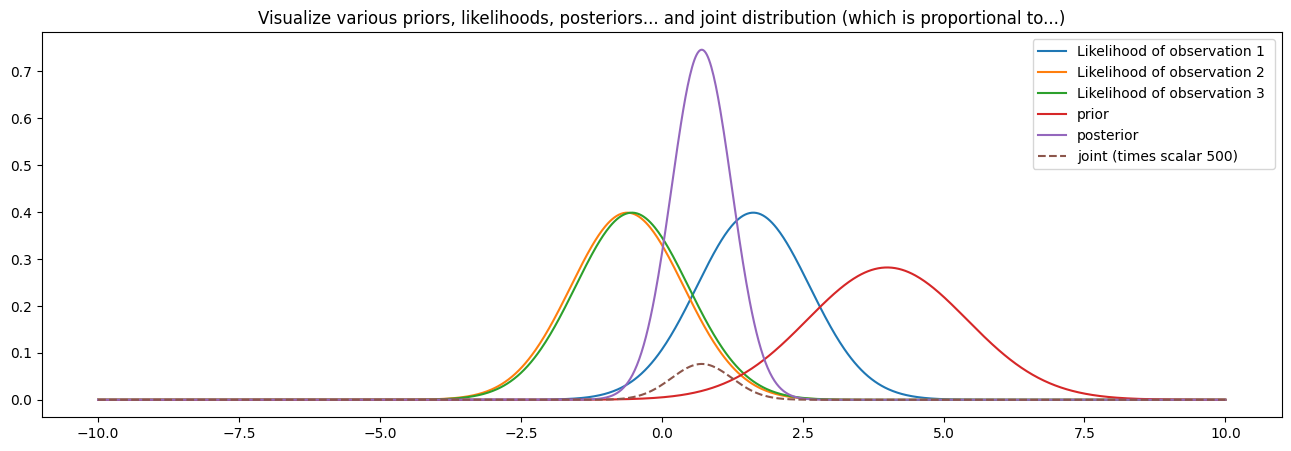

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(1)

n = 3
parameter_domain = np.linspace(-10, 10, 1001)
x = stats.norm(loc=0, scale=1).rvs(n)  # Generate n-many N(0,1) RVs

plt.figure(figsize=(16, 5))

# Plotting the individual likelihoods of each observation
combined_likelihood = np.ones_like(parameter_domain) # To account for multiplication
for i in range(n):
    likelihood_i = stats.norm.pdf(parameter_domain, loc=x[i], scale=1)
    combined_likelihood *= likelihood_i
    # Scaled by factor of c2
    plt.plot(parameter_domain, likelihood_i,
             label=f"Likelihood of observation {i+1} ")

# Calculate and plot prior, posterior and joint distributions (with scaling)
# Format from The "Classic Bayes" Figure
# https://github.com/pointOfive/STA365_W24_Bayes/blob/main/Bayes2_StandardToyModels.ipynb
theta_0, tau = 4, 1/2
c = 500

prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n),
                       scale=1/(tau+n)**0.5).pdf(parameter_domain)
joint = c * combined_likelihood * prior
plt.plot(parameter_domain, prior, label="prior")
plt.plot(parameter_domain, posterior, label="posterior")
plt.plot(parameter_domain, joint, linestyle="--",
         label="joint (times scalar {})".format(c))

plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)")
plt.show()

## Question 2

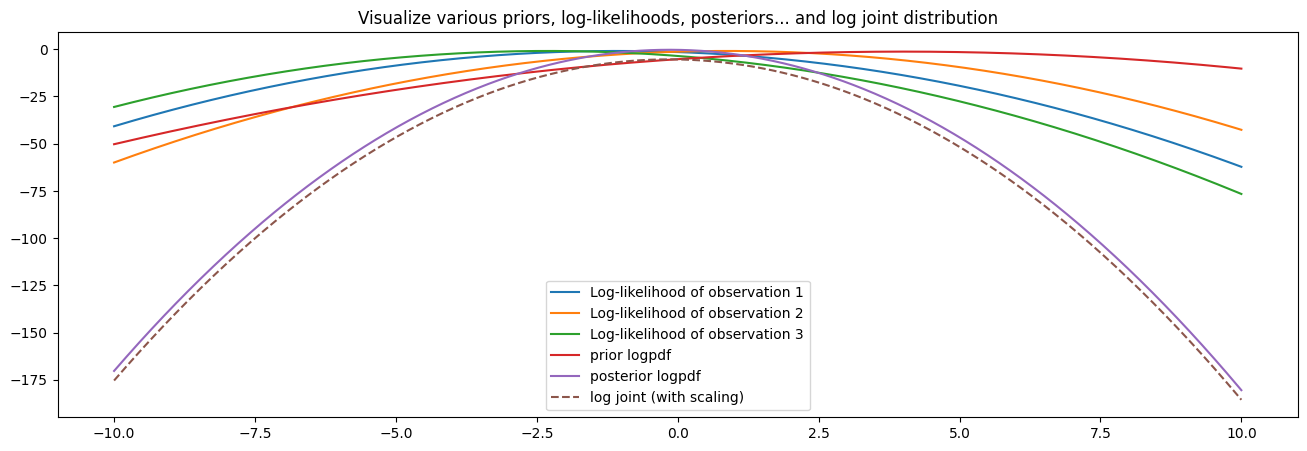

In [35]:
# Variables re-stated for independent cell-execution
n = 3
theta_0, tau = 4, 1/2
c = 500
parameter_domain = np.linspace(-10, 10, 1001)
x = stats.norm(loc=0, scale=1).rvs(n)  # Generate n-many N(0,1) RVs

plt.figure(figsize=(16, 5))

# Plotting the individual log-likelihoods of each observation
combined_log_likelihood = np.zeros_like(parameter_domain) # Account for addition
for i in range(n):
    log_likelihood_i = stats.norm.logpdf(parameter_domain, loc=x[i], scale=1)
    combined_log_likelihood += log_likelihood_i # under logarithmic assumption
    plt.plot(parameter_domain,
             log_likelihood_i, label=f"Log-likelihood of observation {i+1}")

# Prior, posterior, joint
prior_log_pdf = stats.norm.logpdf(parameter_domain, loc=theta_0,
                                  scale=1/tau**0.5)
posterior_log_pdf = stats.norm.logpdf(parameter_domain,
                                     loc=(tau*theta_0 + x.sum())/(tau + n),
                                     scale=1/(tau + n)**0.5)
log_joint = combined_log_likelihood + prior_log_pdf + np.log(c)

# Plotting
plt.plot(parameter_domain, prior_log_pdf, label="prior logpdf")
plt.plot(parameter_domain, posterior_log_pdf, label="posterior logpdf")
plt.plot(parameter_domain, log_joint, linestyle="--",
         label="log joint (with scaling)")

plt.legend()
plt.title("Visualize various priors, log-likelihoods, posteriors... and log joint distribution")
plt.show()

### Question 3

From section ["Types of Priors"](https://github.com/pointOfive/STA365_W24_Bayes/blob/main/Bayes2_StandardToyModels.ipynb), because $p(\theta) \propto 1$, this normal likelihood produces a proper normal posterior distribtion.

### Question 4

Assuming a normal likelihood and provided an improper prior is used, under these conditions, the log likelihood and log posterior are proportional. In this sense, the two differ by the log of the marignal likelihood.